In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scc import strongly_connected_components, critical_cycles, cyclicite, denardo_algorithm, denardo_period
from matrice import calcul_matrix
from graph import draw_graph
from tropical_lib import matrix_multiplication, power, calcul_l, calcul_r

In [2]:
from tqdm.notebook import tqdm

In [10]:
word = "abaccdd"
mu  = calcul_matrix(word)
mu

array([[inf, inf,  1.,  1.,  1.,  1.,  1.],
       [inf,  1.,  1.,  1.,  1.,  1.,  1.],
       [inf,  2.,  2.,  2.,  2.,  2.,  2.],
       [inf,  2.,  2.,  2.,  1.,  1.,  1.],
       [inf,  3.,  3.,  3.,  2.,  2.,  2.],
       [inf,  2.,  2.,  2.,  2.,  2.,  1.],
       [inf,  3.,  3.,  3.,  3.,  3.,  2.]])

In [4]:
inf = float('inf')
mu2 = np.array([[inf, inf,  1.,  1.],
                [inf,  1.,  1.,  1.],
                [inf,  2.,  2.,  2.],
                [inf,  inf,  inf,  1.]])
mu2

array([[inf, inf,  1.,  1.],
       [inf,  1.,  1.,  1.],
       [inf,  2.,  2.,  2.],
       [inf, inf, inf,  1.]])

In [71]:
r = np.array([calcul_r(word)]).transpose()
r

array([[0],
       [0],
       [1]])

In [73]:
r2 = np.array([[-1, -1, -1]]).transpose()
r2

array([[-1],
       [-1],
       [-1]])

In [76]:
i = 1
matrix_multiplication(power(mu, i), r) == matrix_multiplication(power(mu, i + 1), r2)

array([[ True],
       [ True],
       [ True]])

In [63]:
i = 4
all((matrix_multiplication(power(mu, i), r) == matrix_multiplication(power(mu, i + 1), r2)).all() for i in tqdm(range(1, 1000)))

Widget Javascript not detected.  It may not be installed or enabled properly.


AssertionError: Il faut des matrices à 2 dimensions

In [8]:
n = 24
word = "abaccdd"
print((word * n).count("C"))
r = calcul_r(word * n).reshape((n, len(word)))
r

0


array([[ 0,  0,  1,  0,  1,  0,  1],
       [ 1,  1,  2,  1,  2,  2,  3],
       [ 2,  2,  3,  3,  4,  3,  4],
       [ 4,  3,  4,  4,  5,  4,  5],
       [ 5,  4,  5,  5,  6,  5,  6],
       [ 6,  5,  6,  6,  7,  6,  7],
       [ 7,  6,  7,  7,  8,  7,  8],
       [ 8,  7,  8,  8,  9,  8,  9],
       [ 9,  8,  9,  9, 10,  9, 10],
       [10,  9, 10, 10, 11, 10, 11],
       [11, 10, 11, 11, 12, 11, 12],
       [12, 11, 12, 12, 13, 12, 13],
       [13, 12, 13, 13, 14, 13, 14],
       [14, 13, 14, 14, 15, 14, 15],
       [15, 14, 15, 15, 16, 15, 16],
       [16, 15, 16, 16, 17, 16, 17],
       [17, 16, 17, 17, 18, 17, 18],
       [18, 17, 18, 18, 19, 18, 19],
       [19, 18, 19, 19, 20, 19, 20],
       [20, 19, 20, 20, 21, 20, 21],
       [21, 20, 21, 21, 22, 21, 22],
       [22, 21, 22, 22, 23, 22, 23],
       [23, 22, 23, 23, 24, 23, 24],
       [24, 23, 24, 24, 25, 24, 25]])

In [9]:
dr = r[1:] - r[:-1]
dr

array([[1, 1, 1, 1, 1, 2, 2],
       [1, 1, 1, 2, 2, 1, 1],
       [2, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

In [54]:
cyclicite(calcul_matrix("BAAABABCCBC"))

1

In [36]:
def minimum_distance(graph: np.array):
    n = graph.shape[0]
    dist =  graph.copy()

    for k in range(n):
        for i in range(n):
            for j in range(n):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

In [37]:
# from https://www.geeksforgeeks.org/karps-minimum-mean-average-weight-cycle-algorithm/
INF = float("inf")



def shortestpath(graph: np.array):
    n = graph.shape[0]
    
    # initializing all distances as -1
    dp = -np.ones((n + 1, n), dtype=np.float64)
 
    # shortest distance From first vertex
    # to in tself consisting of 0 edges
    dp[0, 0] = 0
 
    # filling up the dp table
    for i in range(1, n + 1):
        for j in range(n):
            for k in range(n):
                if graph[k, j] != INF:
                    if dp[i - 1, k] != -1:
                        curr_wt = dp[i - 1, k] + graph[k, j]
                        if dp[i, j] == -1:
                            dp[i, j] = curr_wt
                        else:
                            dp[i, j] = min(dp[i, j], curr_wt)
    return dp
 
# Returns minimum value of average
# weight of a cycle in graph.
def minAvgWeight(graph: np.array):
    n = graph.shape[0]
    dp = shortestpath(graph)
 
    # array to store the avg values
    avg = -np.ones(n, dtype=np.float64)
 
    # Compute average values for all
    # vertices using weights of
    # shortest paths store in dp.
    for i in range(n):
        if (dp[n][i] != -1):
            for j in range(n):
                if (dp[j][i] != -1):
                    avg[i] = max(avg[i], (dp[n][i] -
                                          dp[j][i]) / (n - j))
 
    return avg

In [5]:
def pente(vec: np.array, period: int):
    """Calcule la pente moyenne de vec sur 2 period
    on doit donner dans period le ppcm de toutes les périodes possibles du mot pour pouvoir calculer les coubes de tendance,
    de plus il faut len(vec) > 3 * period + temps de transition"""
    assert (
        (vec[-period:] - vec[-2 * period: -period]) 
        == 
        (vec[-2 * period: -period] - vec[-3 * period: -2 * period])
            ).all(), f"Le vecteur n'est pas périodique de période {period}"
    return (vec[-1] - vec[-period - 1]) / period

In [6]:
def plot_r_l_m(word: str, n=10, max_period=2):
    """Affiche r, l et r + l pour le mot word * n, 
    on doit donner dans max_period le ppcm de toutes les périodes possibles du mot pour pouvoir calculer les coubes de tendance,
    de plus il faut n > 3 * max_period + temps de transition"""
    r = calcul_r(word * n)
    l = calcul_l(word * n)

    ar = pente(r, max_period * len(word))
    al = -pente(l[::-1], max_period * len(word))

    rl = r + l
    i = rl.max()
    plt.plot(range(len(word) * n), r, label="r", color="blue")
    plt.plot(range(len(word) * n), ar * np.arange(len(word) * n), label=f"r-tendance {ar * len(word)}", color="blue", alpha=0.5)
    plt.plot(range(len(word) * n), l, label="l", color="orange")
    plt.plot(range(len(word) * n), al * np.arange(len(word) * n) + l.max(), label=f"l-tendance {al * len(word)}", color="orange", alpha=0.5)
    plt.plot(range(len(word) * n), rl, label="r + l")
    # plt.axhline(i, label="m - 1", color='red', alpha=0.5)
    plt.title(word)
    plt.legend()
    plt.show()


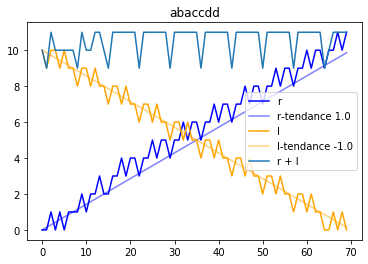

1

In [11]:
word = "abaccdd"
plot_r_l_m(word)
cyclicite(calcul_matrix(word))

In [15]:
def pente_equal(word: str, n=10, max_period=2):
    """Vérifie la conjecture sur l'égalité des pentes"""
    r = calcul_r(word * n)
    l = calcul_l(word * n)

    try:
        ar = pente(r, max_period * len(word))
    except AssertionError:
        input(f"{word} n'est a priori pas de période qui divise {max_period}")
    al = pente(l[::-1], max_period * len(word))

    return ar == al


In [16]:
def pente_form_word(word: str, n=10, max_period=1):
    """Calcule la pente moyenne de vec sur 2 period
    on doit donner dans period le ppcm de toutes les périodes possibles du mot pour pouvoir calculer les coubes de tendance,
    de plus il faut len(vec) > 3 * period + temps de transition"""
    vec = calcul_r(word * n)
    period = len(word) * max_period
    assert (
        (vec[-period:] - vec[-2 * period: -period]) 
        == 
        (vec[-2 * period: -period] - vec[-3 * period: -2 * period])
            ).all(), f"Le vecteur du mot {word} n'est pas périodique de période {max_period}"
    return (vec[-1] - vec[-period - 1]) / period * len(word)

In [17]:
def to_base(n, base=2):
    """Ecrit le nombre n en base base,
    permet d'itérer sur les mots d'un alphabet à base lettres"""
    res = ""
    while n:
        n, r = divmod(n, base)
        res = chr(r + 65) + res
    return res

In [18]:
pente_equal("abbabbbcba")

True

In [109]:
[b for b in "gviygig"]

['g', 'v', 'i', 'y', 'g', 'i', 'g']

In [19]:
def minority(word, mino="C"):
    word = word.upper()
    pw = pente_form_word(word, max_period=2)
    w2 = "".join(mino if c == mino else "B" for c in word)
    print(word, w2)
    pw2 = pente_form_word(w2)
    return pw, pw2



In [20]:
minority("BAAABABCCBC")

BAAABABCCBC BBBBBBBCCBC


(2.0, 3.0)

In [29]:
for i in range(1, 60_000):
    w = to_base(i, 3)
    if w.count("A") >= w.count("B") and w.count("B") > w.count("C"):
        if w.count("C") > 0:
            pw, pw2 = minority(w, mino="C")
            if pw != pw2:
                print(w, "\t", pw, pw2, "X" if pw != pw2 else "")

BAAACCBB 	 1.5 2.0 X
BBAAACCB 	 1.5 2.0 X
BBBAAACC 	 1.5 2.0 X
BBBCCAAA 	 1.5 2.0 X
BBCCAAAB 	 1.5 2.0 X
BCCAAABB 	 1.5 2.0 X
CAAABBBC 	 1.5 2.0 X
CBBBAAAC 	 1.5 2.0 X
CCAAABBB 	 1.5 2.0 X
CCBBBAAA 	 1.5 2.0 X
BAAAACCBB 	 1.5 2.0 X
BBAAAACCB 	 1.5 2.0 X
BBBAAAACC 	 1.5 2.0 X
BBBCCAAAA 	 1.5 2.0 X
BBCCAAAAB 	 1.5 2.0 X
BCCAAAABB 	 1.5 2.0 X
CAAAABBBC 	 1.5 2.0 X
CBBBAAAAC 	 1.5 2.0 X
CCAAAABBB 	 1.5 2.0 X
CCBBBAAAA 	 1.5 2.0 X
BAAAAACCBB 	 1.5 2.0 X
BAAAACCBBB 	 1.5 2.0 X
BBAAAAACCB 	 1.5 2.0 X
BBAAAACCBB 	 1.5 2.0 X
BBBAAAAACC 	 1.5 2.0 X
BBBAAAACCB 	 1.5 2.0 X
BBBBAAAACC 	 1.5 2.0 X
BBBBCCAAAA 	 1.5 2.0 X
BBBCCAAAAA 	 1.5 2.0 X
BBBCCAAAAB 	 1.5 2.0 X
BBCCAAAAAB 	 1.5 2.0 X
BBCCAAAABB 	 1.5 2.0 X
BCCAAAAABB 	 1.5 2.0 X
BCCAAAABBB 	 1.5 2.0 X
CAAAAABBBC 	 1.5 2.0 X
CAAAABBBBC 	 1.5 2.0 X
CBBBAAAAAC 	 1.5 2.0 X
CBBBBAAAAC 	 1.5 2.0 X
CCAAAAABBB 	 1.5 2.0 X
CCAAAABBBB 	 1.5 2.0 X
CCBBBAAAAA 	 1.5 2.0 X
CCBBBBAAAA 	 1.5 2.0 X
BAAAAAACCBB 	 1.5 2.0 X
BAAAAACCBBB 	 1.5 2.0 X
BAAAABBCBCC 	 2.

In [102]:
for i in range(1, 1_000):
    w = to_base(i, 2)
    if w.count("A") >= w.count("B"):
        p = pente_form_word(w)
        if w.count("B") > p:
            print(w, "\t", p, w.count("A"), w.count("B"), "O" if w.count("B") == w.count("A") else cyclicite(calcul_matrix(w)))

BAAABB 	 2.0 3 3 O
BBAAAB 	 2.0 3 3 O
BBBAAA 	 2.0 3 3 O
BAAAABB 	 2.0 4 3 1
BBAAAAB 	 2.0 4 3 1
BBBAAAA 	 2.0 4 3 1
BAAAAABB 	 2.0 5 3 1
BAAAABBB 	 2.0 4 4 O
BAAABABB 	 3.0 4 4 O
BAAABBAB 	 3.0 4 4 O
BAAABBBA 	 3.0 4 4 O
BAABAABB 	 3.0 4 4 O
BAABBBAA 	 3.0 4 4 O
BABAAABB 	 3.0 4 4 O
BABBAAAB 	 3.0 4 4 O
BABBBAAA 	 3.0 4 4 O
BBAAAAAB 	 2.0 5 3 1
BBAAAABB 	 2.0 4 4 O
BBAAABAB 	 3.0 4 4 O
BBAAABBA 	 3.0 4 4 O
BBAABAAB 	 3.0 4 4 O
BBABAAAB 	 3.0 4 4 O
BBABBAAA 	 3.0 4 4 O
BBBAAAAA 	 2.0 5 3 1
BBBAAAAB 	 2.0 4 4 O
BBBAAABA 	 3.0 4 4 O
BBBAABAA 	 3.0 4 4 O
BBBABAAA 	 3.0 4 4 O
BBBBAAAA 	 2.0 4 4 O
BAAAAAABB 	 2.0 6 3 1
BAAAAABBB 	 2.0 5 4 1
BAAAABABB 	 3.0 5 4 1
BAAAABBAB 	 3.0 5 4 1
BAAAABBBA 	 3.0 5 4 1
BAAABAABB 	 3.0 5 4 1
BAAABBBAA 	 3.0 5 4 1
BAABAAABB 	 3.0 5 4 1
BAABBBAAA 	 3.0 5 4 1
BABAAAABB 	 3.0 5 4 1
BABBAAAAB 	 3.0 5 4 1
BABBBAAAA 	 3.0 5 4 1
BBAAAAAAB 	 2.0 6 3 1
BBAAAAABB 	 2.0 5 4 1
BBAAAABAB 	 3.0 5 4 1
BBAAAABBA 	 3.0 5 4 1
BBAAABAAB 	 3.0 5 4 1
BBAABAAAB 	 3.0 5 4 1
BBAB

In [108]:
for i in range(1, 15000):
    w = to_base(i, 3)
    if w.count("A") >= w.count("B") and w.count("B") >= w.count("C"):
        p = pente_form_word(w, max_period=2)
        if w.count("C") >= p:
            print(w, "\t", p, w.count("A"), w.count("B"), w.count("C"), "O" if w.count("C") == p else "X" + str(cyclicite(calcul_matrix(w))))

BAC 	 1.0 1 1 1 O
BCA 	 1.0 1 1 1 O
CAB 	 1.0 1 1 1 O
CBA 	 1.0 1 1 1 O
BAAC 	 1.0 2 1 1 O
BACA 	 1.0 2 1 1 O
BCAA 	 1.0 2 1 1 O
CAAB 	 1.0 2 1 1 O
CABA 	 1.0 2 1 1 O
CBAA 	 1.0 2 1 1 O
BAAAC 	 1.0 3 1 1 O
BAABC 	 1.0 2 2 1 O
BAACA 	 1.0 3 1 1 O
BAACB 	 1.0 2 2 1 O
BABAC 	 1.0 2 2 1 O
BABCA 	 1.0 2 2 1 O
BACAA 	 1.0 3 1 1 O
BACAB 	 1.0 2 2 1 O
BACBA 	 1.0 2 2 1 O
BBAAC 	 1.0 2 2 1 O
BBACA 	 1.0 2 2 1 O
BBCAA 	 1.0 2 2 1 O
BCAAA 	 1.0 3 1 1 O
BCAAB 	 1.0 2 2 1 O
BCABA 	 1.0 2 2 1 O
BCBAA 	 1.0 2 2 1 O
CAAAB 	 1.0 3 1 1 O
CAABA 	 1.0 3 1 1 O
CAABB 	 1.0 2 2 1 O
CABAA 	 1.0 3 1 1 O
CABAB 	 1.0 2 2 1 O
CABBA 	 1.0 2 2 1 O
CBAAA 	 1.0 3 1 1 O
CBAAB 	 1.0 2 2 1 O
CBABA 	 1.0 2 2 1 O
CBBAA 	 1.0 2 2 1 O
BAAAAC 	 1.0 4 1 1 O
BAAABC 	 1.0 3 2 1 O
BAAACA 	 1.0 4 1 1 O
BAAACB 	 1.0 3 2 1 O
BAABAC 	 1.0 3 2 1 O
BAABCA 	 1.0 3 2 1 O
BAABCC 	 2.0 2 2 2 O
BAACAA 	 1.0 4 1 1 O
BAACAB 	 1.0 3 2 1 O
BAACBA 	 1.0 3 2 1 O
BAACBC 	 2.0 2 2 2 O
BAACCB 	 1.5 2 2 2 X2
BABAAC 	 1.0 3 2 1 O
BABACA 	 1.0 3 2 1 O

In [107]:
bin(4564)[2:]

'1000111010100'

In [115]:
all(pente_equal(bin(i)[2:]) for i in tqdm(range(2 ** 18)))


100%|██████████| 262144/262144 [07:07<00:00, 613.25it/s]


True

In [22]:
%%time
all(pente_equal(to_base(i, 2)) for i in range(1, 2 ** 14))

CPU times: user 19.5 s, sys: 8.25 ms, total: 19.5 s
Wall time: 19.5 s


True

In [24]:
%%time
all(
    pente_equal(bin(i)[2:]) for i in range(2 ** 14)
    )

CPU times: user 19.4 s, sys: 12.8 ms, total: 19.4 s
Wall time: 19.4 s


True

In [50]:
all(pente_equal(to_base(i, 3)) for i in tqdm(range(1, 3 ** 10)))

True

In [49]:
all(pente_equal(to_base(i, 4), max_period=6, n=25) for i in tqdm(range(1, 4 ** 9)))

True

In [53]:
all(pente_equal(to_base(i, 5), max_period=12, n=40) for i in tqdm(range(1, 5 ** 7)))

True

In [58]:
all(pente_equal(to_base(i, 6), max_period=60, n=200) for i in tqdm(range(1, 6 ** 5)))

True

In [61]:
all(pente_equal(to_base(i, 7), max_period=60, n=200) for i in tqdm(range(1, 7 ** 5)))

True

In [33]:
all(pente_equal(to_base(i, 8), max_period=420, n=1300) for i in tqdm(range(1, 8 ** 4)))

True

In [48]:
cyclicite(calcul_matrix("BAACCB"))

2

In [27]:
np.lcm(60, 7)

420